In [1]:
import pandas as pd

# Define the heads, relations, and tails
# head = ['drugA', 'drugB', 'drugC', 'drugD', 'drugA', 'drugC', 'drugD', 'drugE', 'gene1', 'gene2','gene3', 'gene4', 'gene50', 'gene2', 'gene3', 'gene4']
# relation = ['treats', 'treats', 'treats', 'treats', 'inhibits', 'inhibits', 'inhibits', 'inhibits', 'associated', 'associated', 'associated', 'associated', 'associated', 'interacts', 'interacts', 'interacts']
# tail = ['fever', 'hepatitis', 'bleeding', 'pain', 'gene1', 'gene2', 'gene4', 'gene20', 'obesity', 'heart_attack', 'hepatitis', 'bleeding', 'cancer', 'gene1', 'gene20', 'gene50']

# # Create a dataframe
# df = pd.DataFrame({'head': head, 'relation': relation, 'tail': tail})
# df.to_csv("graph.csv")
df = pd.read_csv("Financials.csv")

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a knowledge graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['Segment'], row['Country'], label=row['Product'])

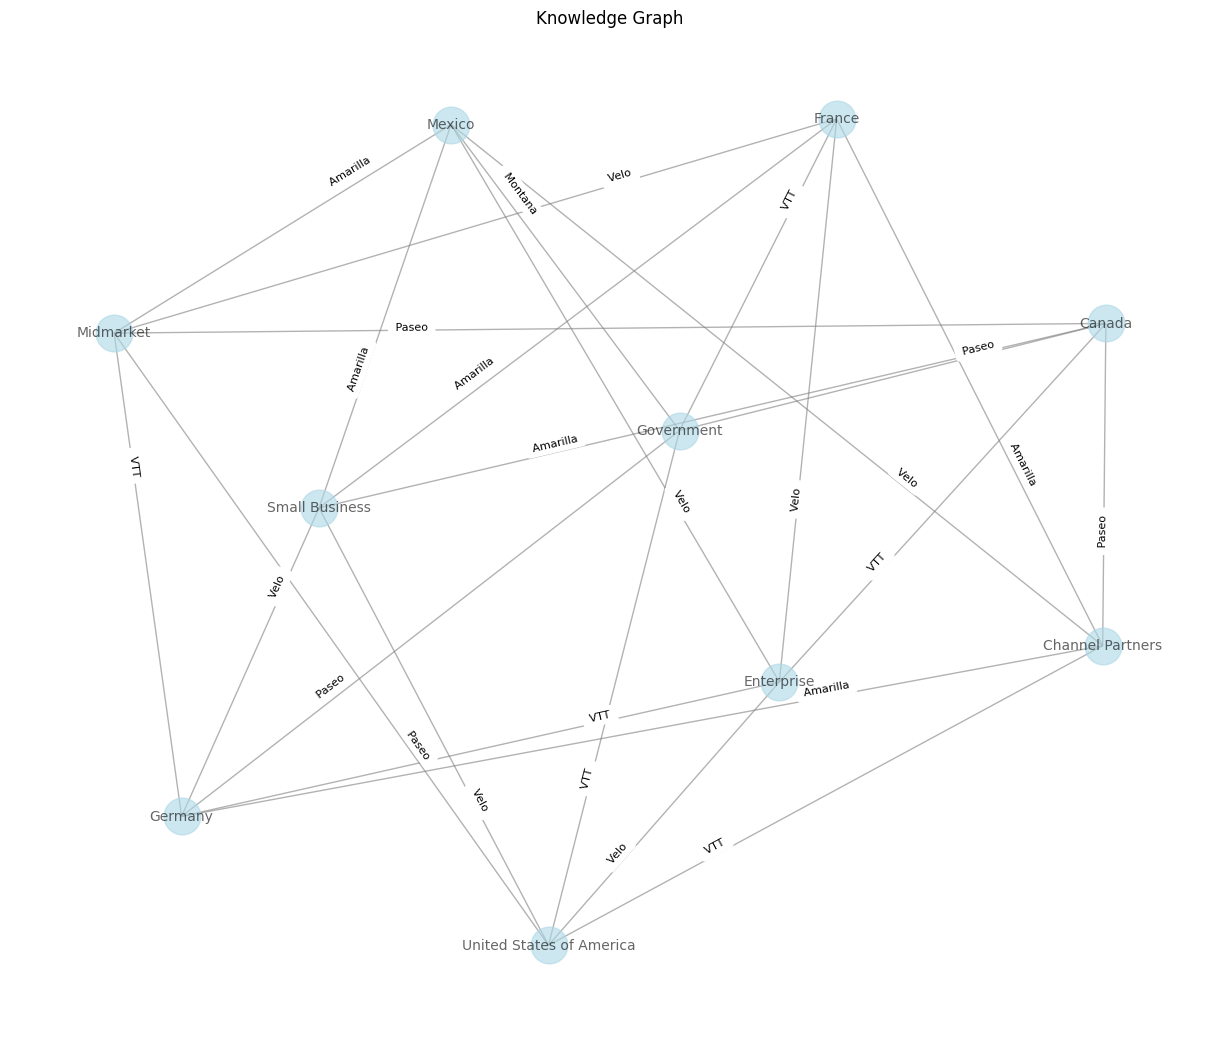

In [3]:
# Visualize the knowledge graph
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

In [ ]:
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
    print(f'{node}: Degree Centrality = {centrality:.2f}')

# Degree centrality counts the number of edges incident on a node. 
# Nodes with higher degree of centrality are more connected.

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
for node, centrality in betweenness_centrality.items():
    print(f'Betweenness Centrality of {node}: {centrality:.2f}')

# Betweenness centrality measures how often a node lies on the shortest path between other nodes, 
# or in other words, the influence of a node on the flow of information between other nodes. 
# Nodes with high betweenness centrality can act as bridges between different parts of the graph.


In [ ]:
closeness_centrality = nx.closeness_centrality(G)
for node, centrality in closeness_centrality.items():
    print(f'Closeness Centrality of {node}: {centrality:.2f}')

# Closeness centrality quantifies how quickly a node can reach all other nodes in the graph. 
# Nodes with higher closeness centrality are considered more central because 
# they can communicate with other nodes more efficiently.

In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualize centrality measures
plt.figure(figsize=(15, 10))

# Degree centrality
plt.subplot(131)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in degree_centrality.values()], node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color='gray', alpha=0.6)
plt.title('Degree Centrality')

# Betweenness centrality
plt.subplot(132)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in betweenness_centrality.values()], node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6)
plt.title('Betweenness Centrality')

# Closeness centrality
plt.subplot(133)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in closeness_centrality.values()], node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color='gray', alpha=0.6)
plt.title('Closeness Centrality')

plt.tight_layout()
plt.show()

In [ ]:
source_node = 'gene2'
target_node = 'cancer'

# Find the shortest path
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)

# Visualize the shortest path
plt.figure(figsize=(10, 8))
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title(f'Shortest Path from {source_node} to {target_node}')
plt.show()
print('Shortest Path:', shortest_path)

In [ ]:
# !pip install scikit-learn
from node2vec import Node2Vec

# Generate node embeddings using node2vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4) # You can adjust these parameters
model = node2vec.fit(window=10, min_count=1, batch_words=4) # Training the model

# Visualize node embeddings using t-SNE

from sklearn.manifold import TSNE
import numpy as np

# Get embeddings for all nodes
embeddings = np.array([model.wv[node] for node in G.nodes()])

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=10, n_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)
print(embeddings_2d)

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

# # Add node labels
# for i, node in enumerate(G.nodes()):
#     plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)
#     plt.title('Node Embeddings Visualization')
#     plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering on node embeddings
num_clusters = 4 # Adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Visualize K-Means clustering in the embedding space with node labels
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=plt.cm.Set1, alpha=0.7)

# Add node labels
for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('K-Means Clustering in Embedding Space with Node Labels')

plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:
# Perform K-Means clustering on node embeddings
num_clusters = 3 # Adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Visualize clusters
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color="gray", alpha=0.6)
plt.title('Graph Clustering using K-Means')

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering on node embeddings
dbscan = DBSCAN(eps=1.0, min_samples=2) # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(embeddings)

# Visualize clusters
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using DBSCAN')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'G' is your pre-defined graph and 'pos' is positions of nodes (possibly using nx.spring_layout or similar)
pos = nx.spring_layout(G)  # Calculate layout for better visualization

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualize centrality measures
plt.figure(figsize=(15, 12))  # Adjust the figure size to give more space

# Degree centrality
plt.subplot(131)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in degree_centrality.values()], 
        node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color='gray', alpha=0.6)
plt.title('Degree Centrality')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), ax=plt.gca(), orientation='vertical', label='Centrality Value')
# Explanation: Degree centrality measures the number of direct connections a node has. Higher values indicate more connections.

# Betweenness centrality
plt.subplot(132)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in betweenness_centrality.values()], 
        node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6)
plt.title('Betweenness Centrality')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Oranges), ax=plt.gca(), orientation='vertical', label='Centrality Value')
# Explanation: Betweenness centrality measures how often a node acts as a bridge along the shortest path between two other nodes. Nodes with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

# Closeness centrality
plt.subplot(133)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in closeness_centrality.values()], 
        node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color='gray', alpha=0.6)
plt.title('Closeness Centrality')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Greens), ax=plt.gca(), orientation='vertical', label='Centrality Value')
# Explanation: Closeness centrality measures how short the shortest paths are from a given node to all other nodes in the network. Higher closeness values suggest that a node can spread information efficiently through the network.

plt.tight_layout()
plt.show()

